In [18]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [3]:
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [4]:
aapl.head()

,Adj. Close
Date,
2012-01-03,53.063218
2012-01-04,53.348386
2012-01-05,53.940658
2012-01-06,54.504543
2012-01-09,54.418089


In [5]:
aapl.iloc[0]['Adj. Close']

53.063217800141004

In [6]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [7]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.547742,2.177549
2016-12-27,116.281568,2.191378
2016-12-28,115.785740,2.182034
2016-12-29,115.755990,2.181473
2016-12-30,114.853583,2.164467


In [8]:
#30% in apple
#20% in cisco
#40% in ibm
#10% in amzn

In [9]:
for stock_df, allo in zip((aapl,cisco,ibm,amzn),[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [10]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,53.063218,1.000000,0.300000
2012-01-04,53.348386,1.005374,0.301612
2012-01-05,53.940658,1.016536,0.304961
2012-01-06,54.504543,1.027162,0.308149
2012-01-09,54.418089,1.025533,0.307660


In [11]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [12]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,53.063218,1.000000,0.300000,300000.000000
2012-01-04,53.348386,1.005374,0.301612,301612.236461
2012-01-05,53.940658,1.016536,0.304961,304960.727573
2012-01-06,54.504543,1.027162,0.308149,308148.724558
2012-01-09,54.418089,1.025533,0.307660,307659.946988


In [13]:
all_pos_vals = [aapl['Position Values'],cisco['Position Values'],ibm['Position Values'], amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals, axis=1)

In [14]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [15]:
portfolio_val.columns = ['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos']

In [16]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06
2012-01-10,308761.520317,202147.074611,389286.097692,100173.155337,1.000368e+06
2012-01-11,308258.152372,204723.564144,391454.643049,99927.386472,1.004364e+06
2012-01-12,307411.910610,205582.393988,387654.320988,98268.446629,9.989171e+05
2012-01-13,306259.270968,204616.210413,384669.887279,99659.274982,9.952046e+05


Text(0.5, 1.0, 'Total Portfolio Value')

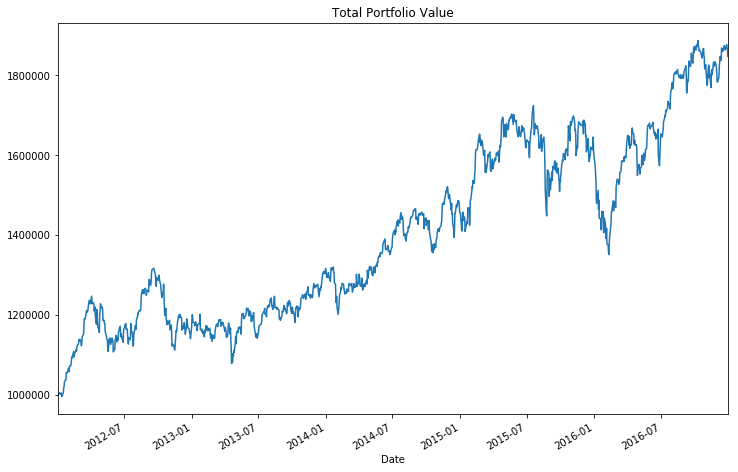

In [20]:
portfolio_val['Total Pos'].plot(figsize=(12,8))
plt.title('Total Portfolio Value')

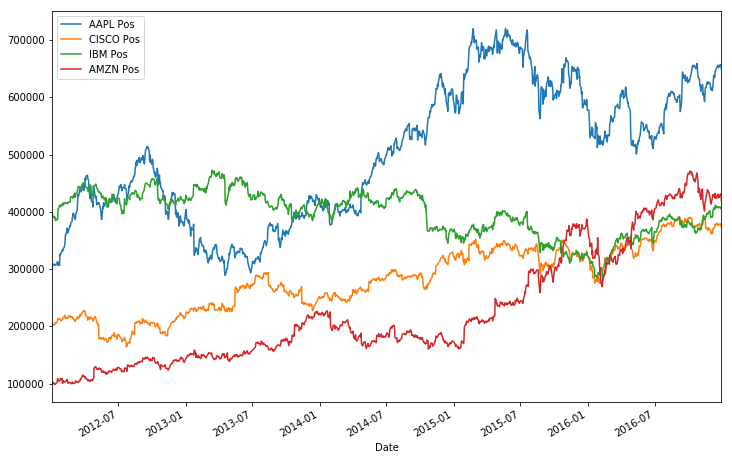

In [22]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(12,8))

In [23]:
portfolio_val['Daily Returns'] = portfolio_val['Total Pos'].pct_change(1)
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Returns
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [24]:
portfolio_val['Daily Returns'].mean()

0.0005442330716215279

In [25]:
portfolio_val['Daily Returns'].std()

0.010568287769162557

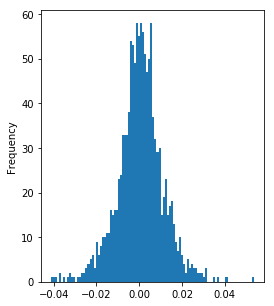

In [26]:
portfolio_val['Daily Returns'].plot(kind='hist', bins=100, figsize=(4,5))

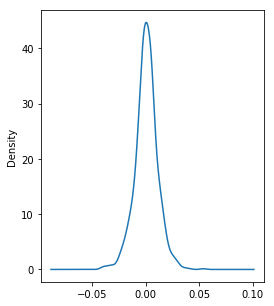

In [27]:
portfolio_val['Daily Returns'].plot(kind='kde', figsize=(4,5))

In [28]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0]-1)

In [29]:
cumulative_return

84.74285181665459

In [30]:
SR = portfolio_val['Daily Returns'].mean() / portfolio_val['Daily Returns'].std()
SR

0.05149680662647716

In [31]:
ASR = (252**0.5)*SR
ASR

0.81748646188585